In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/nutrients_csvfile.csv'
data = pd.read_csv(file_path)


In [4]:
data.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [5]:
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


,0
Food,0
Measure,0
Grams,0
Calories,1
Protein,0
Fat,0
Sat.Fat,2
Fiber,0
Carbs,0
Category,0


In [6]:
print(data.head())


                    Food Measure  Grams Calories Protein Fat Sat.Fat Fiber  \
0             Cows' milk   1 qt.    976      660      32  40      36     0   
1              Milk skim   1 qt.    984      360      36   t       t     0   
2             Buttermilk   1 cup    246      127       9   5       4     0   
3  Evaporated, undiluted   1 cup    252      345      16  20      18     0   
4         Fortified milk  6 cups  1,419    1,373      89  42      23   1.4   

  Carbs        Category  
0    48  Dairy products  
1    52  Dairy products  
2    13  Dairy products  
3    24  Dairy products  
4   119  Dairy products  


In [7]:
print(data.describe())


          Food Measure Grams Calories Protein  Fat Sat.Fat Fiber Carbs  \
count      335     335   335      334     335  335     333   335   335   
unique     329      61   103      152      40   45      38    57    80   
top     Butter   1 cup   100      100       1    t       0     0     0   
freq         3     120    38       14      53  115     174   116    45   

                                Category  
count                                335  
unique                                16  
top     Breads, cereals, fastfood,grains  
freq                                  45  


In [8]:
print("Columns in dataset:", data.columns)


Columns in dataset: Index(['Food', 'Measure', 'Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat',
       'Fiber', 'Carbs', 'Category'],
      dtype='object')


In [9]:
from sklearn.preprocessing import MinMaxScaler


In [10]:
# Convert numeric columns from text to float, handling "t" values
numeric_cols = ["Grams", "Calories", "Protein", "Fat", "Sat.Fat", "Fiber", "Carbs"]
data[numeric_cols] = data[numeric_cols].replace("t", 0.001)
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')



In [11]:

# Handle missing values by filling with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)



In [12]:

# Feature Engineering: Add Caloric Density
data["Caloric_Density"] = data["Calories"] / data["Grams"]

# Create Healthy/Unhealthy Label (Threshold: Calories > 250 per 100g, Fat > 15g per 100g)
data["Healthy_Label"] = ((data["Calories"] / data["Grams"]) * 100 < 250) & ((data["Fat"] / data["Grams"]) * 100 < 15)
data["Healthy_Label"] = data["Healthy_Label"].astype(int)  # Convert to 0 (Unhealthy) & 1 (Healthy)

# Normalize numerical features
scaler = MinMaxScaler()
num_cols = ["Calories", "Protein", "Fat", "Sat.Fat", "Fiber", "Carbs", "Caloric_Density"]
data[num_cols] = scaler.fit_transform(data[num_cols])


# Save preprocessed data
data.to_csv("preprocessed_nutrients.csv", index=False)


In [13]:

data.head()


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,Caloric_Density,Healthy_Label
0,Cows' milk,1 qt.,976.000000,0.665323,0.141631,0.171674,0.153846,0.000000,0.203390,Dairy products,0.074985,1
1,Milk skim,1 qt.,984.000000,0.362903,0.158798,0.000004,0.000004,0.000000,0.220339,Dairy products,0.040568,1
2,Buttermilk,1 cup,246.000000,0.128024,0.042918,0.021459,0.017094,0.000000,0.055085,Dairy products,0.057247,1
3,"Evaporated, undiluted",1 cup,252.000000,0.347782,0.072961,0.085837,0.076923,0.000000,0.101695,Dairy products,0.151810,1
4,Fortified milk,6 cups,139.392216,0.181256,0.386266,0.180258,0.098291,0.005957,0.504237,Dairy products,0.143036,0


In [14]:
# Handling Missing Values
data.fillna(data.median(numeric_only=True), inplace=True)  # Fill numeric NaN with median
data.fillna(data.mode().iloc[0], inplace=True)  # Fill categorical NaN with mode



In [15]:
# Standardizing Column Names
data.columns = data.columns.str.lower().str.replace(" ", "_")

# Encoding Categorical Column (One-Hot Encoding for 'Category')
data = pd.get_dummies(data, columns=["category"], drop_first=True)

# Normalizing Numerical Columns
numeric_cols = ["calories", "protein", "fat", "sat.fat", "fiber", "carbs", "caloric_density"]
data[numeric_cols] = (data[numeric_cols] - data[numeric_cols].min()) / (data[numeric_cols].max() - data[numeric_cols].min())

# Save the cleaned dataset
cleaned_file_path = "/content/drive/MyDrive/cleaned_nutrients.csv"
data.to_csv(cleaned_file_path, index=False)

print("\n Data Cleaning Complete! Cleaned dataset saved as:", cleaned_file_path)
print("\n Preview of Cleaned Data:\n", data.head())



 Data Cleaning Complete! Cleaned dataset saved as: /content/drive/MyDrive/cleaned_nutrients.csv

 Preview of Cleaned Data:
                     food measure       grams  calories   protein       fat  \
0             Cows' milk   1 qt.  976.000000  0.665323  0.141631  0.171674   
1              Milk skim   1 qt.  984.000000  0.362903  0.158798  0.000004   
2             Buttermilk   1 cup  246.000000  0.128024  0.042918  0.021459   
3  Evaporated, undiluted   1 cup  252.000000  0.347782  0.072961  0.085837   
4         Fortified milk  6 cups  139.392216  0.181256  0.386266  0.180258   

    sat.fat     fiber     carbs  caloric_density  ...  category_Fruits A-F  \
0  0.153846  0.000000  0.203390         0.074985  ...                False   
1  0.000004  0.000000  0.220339         0.040568  ...                False   
2  0.017094  0.000000  0.055085         0.057247  ...                False   
3  0.076923  0.000000  0.101695         0.151810  ...                False   
4  0.098291  0.0

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
file_path = "/content/drive/MyDrive/cleaned_nutrients.csv"
data = pd.read_csv(file_path)

# Basic Statistics
print(" Dataset Summary:\n", data.describe())



 Dataset Summary:
             grams    calories     protein         fat     sat.fat       fiber  \
count  335.000000  335.000000  335.000000  335.000000  335.000000  335.000000   
mean   139.392216    0.181256    0.041087    0.036765    0.027515    0.010111   
std    119.754910    0.155721    0.076110    0.084945    0.078898    0.068316   
min     11.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     60.000000    0.075605    0.008584    0.000004    0.000000    0.000000   
50%    108.000000    0.136089    0.017167    0.004292    0.000000    0.000851   
75%    200.000000    0.246976    0.055794    0.042918    0.032051    0.004255   
max    984.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            carbs  caloric_density  healthy_label  
count  335.000000       335.000000     335.000000  
mean     0.105858         0.225052       0.632836  
std      0.151835         0.211046       0.482753  
min      0.000000         0.000000       0.

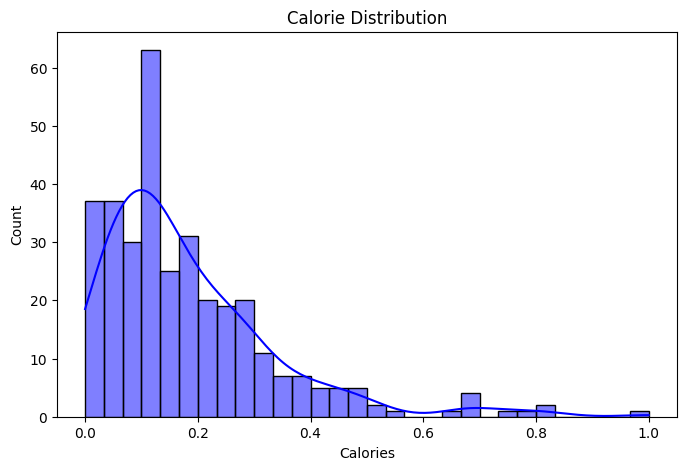

In [17]:
# Distribution of Calories
plt.figure(figsize=(8, 5))
sns.histplot(data['calories'], bins=30, kde=True, color="blue")
plt.title("Calorie Distribution")
plt.xlabel("Calories")
plt.ylabel("Count")
plt.show()



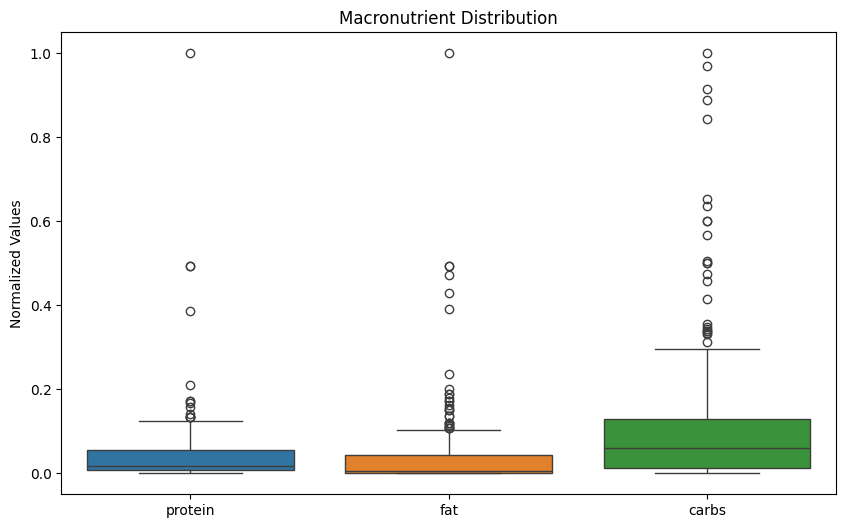

In [18]:
# Boxplot for Macronutrient Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[["protein", "fat", "carbs"]])
plt.title("Macronutrient Distribution")
plt.ylabel("Normalized Values")
plt.show()



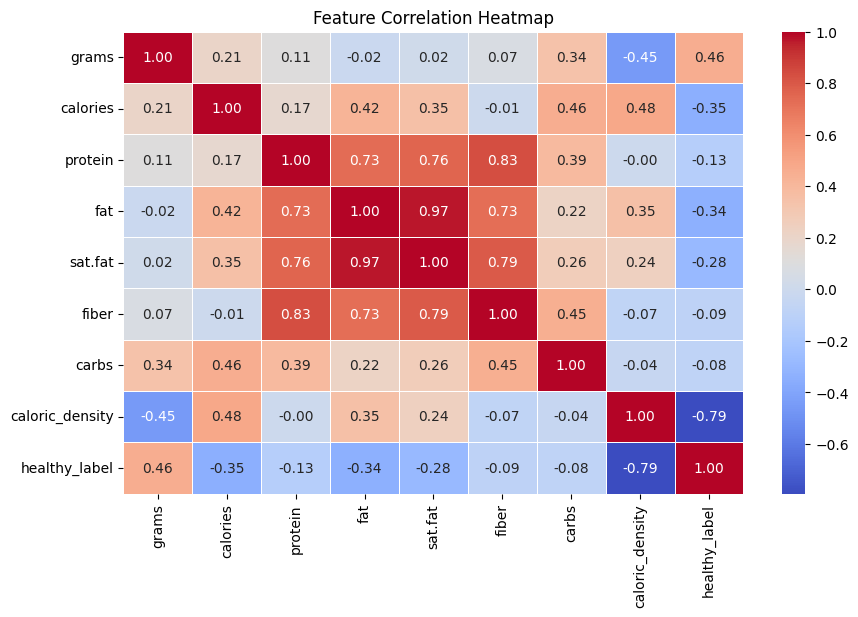

In [19]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Heatmap for Correlations (Fixed)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



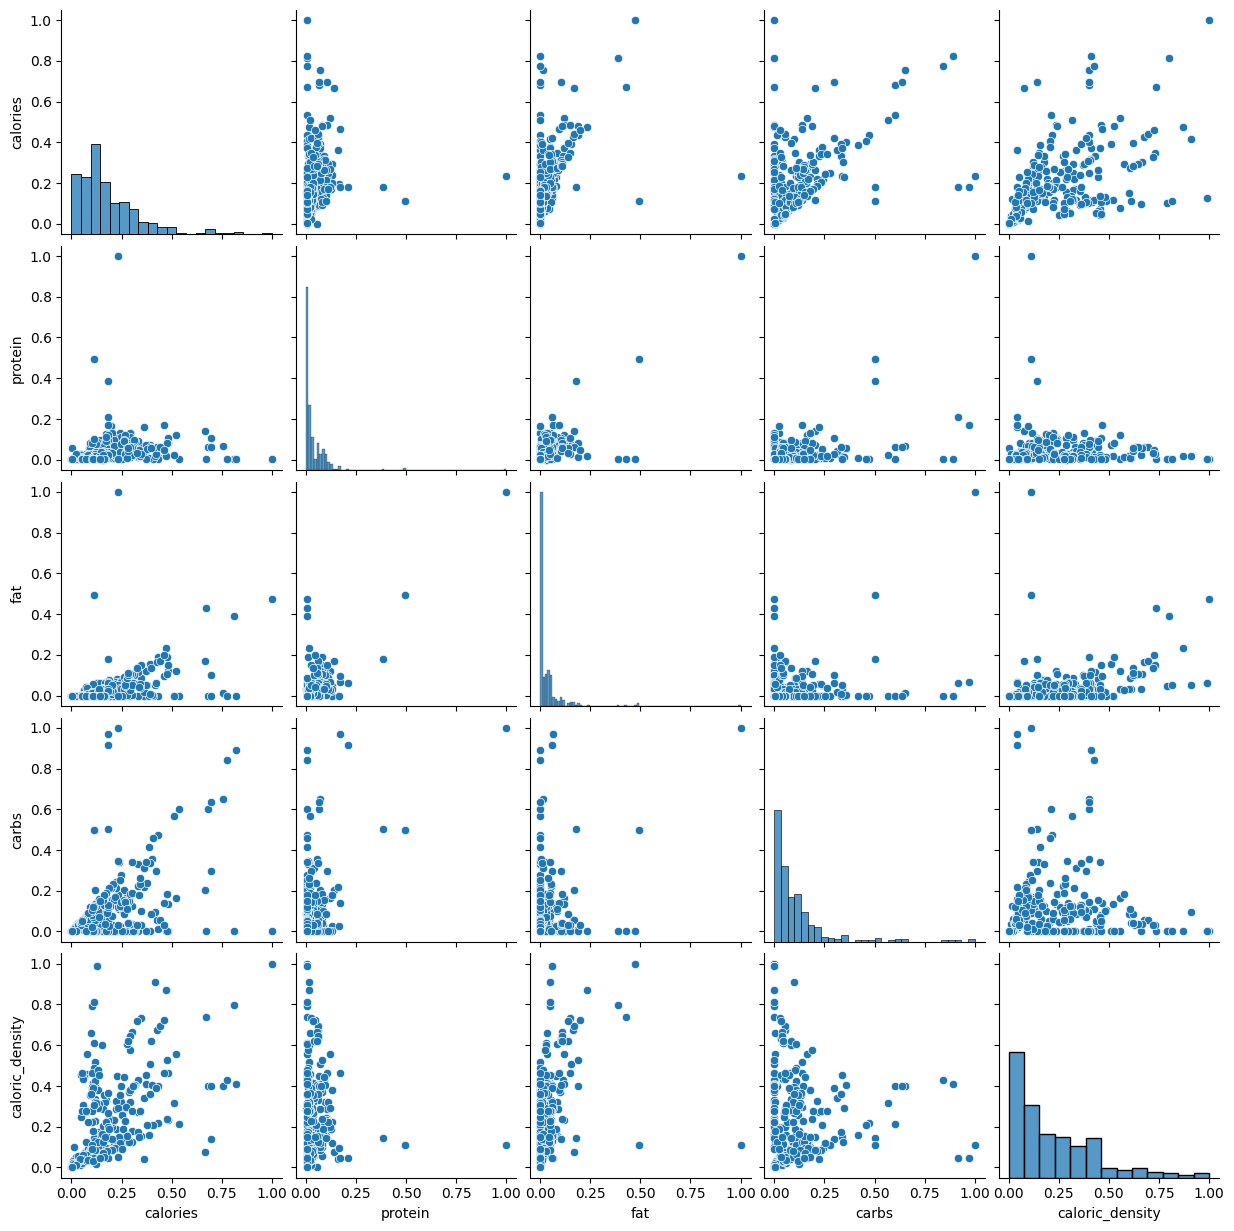

In [20]:
# Pairplot for Key Features
selected_features = ["calories", "protein", "fat", "carbs", "caloric_density"]
sns.pairplot(data[selected_features])
plt.show()

In [21]:
# Final Health Score with Stronger Fat Penalty
data["health_score"] = (
    data["protein"] * 4 +  # More weight on protein
    data["fiber"] * 5 +    # Fiber is critical
    (1 - data["fat"]) * 5 +  # Heavy penalty for fat
    (1 - data["calories"] / 500) +  # Reduce calorie influence (scale to range)
    - data["sat.fat"] * 5  # Much stronger penalty for saturated fat
)

# Sort and display refined healthiest foods
top_healthy = data.sort_values(by="health_score", ascending=False).head(10)
print("Final Refined Top 10 Healthiest Foods:\n", top_healthy[["food", "health_score"]])


Final Refined Top 10 Healthiest Foods:
                   food  health_score
224        Whole-wheat      7.762905
19           uncreamed      6.669092
1            Milk skim      6.634424
7    skim, non-instant      6.552838
6        skim, instant      6.531561
88              Shrimp      6.390336
73                 Cod      6.390215
76            Flounder      6.360112
89           Swordfish      6.351568
95   Lima, dry, cooked      6.333832


<ipython-input-22-e2c795ae4b1e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_healthy["food"], x=top_healthy["health_score"], palette="Greens_r")


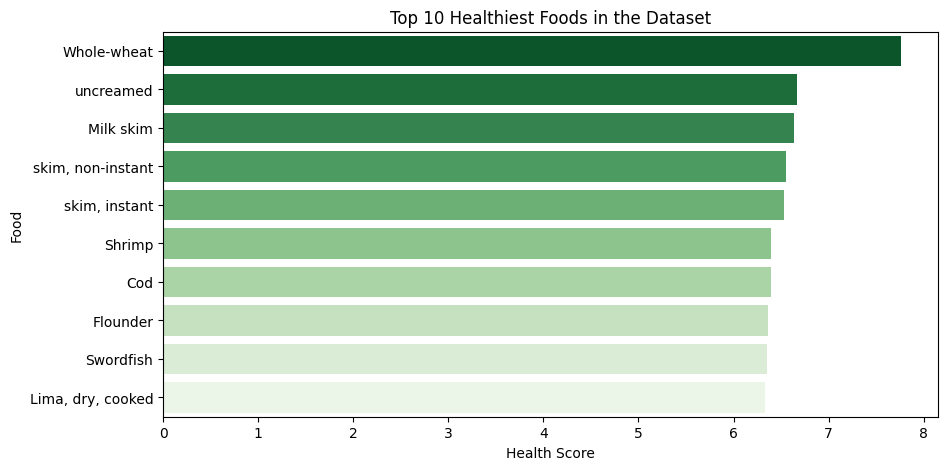

In [22]:


# Calculate the health score (make sure this step has been run first)
data["health_score"] = (
    data["protein"] * 4 +  # More weight on protein
    data["fiber"] * 5 +    # Fiber is critical
    (1 - data["fat"]) * 5 +  # Heavy penalty for fat
    (1 - data["calories"] / 500) +  # Reduce calorie influence (scale to range)
    - data["sat.fat"] * 5  # Much stronger penalty for saturated fat
)

# Sort and get the top 10 healthiest foods
top_healthy = data.sort_values(by="health_score", ascending=False).head(10)

# Bar Plot of the Healthiest Foods
plt.figure(figsize=(10, 5))
sns.barplot(y=top_healthy["food"], x=top_healthy["health_score"], palette="Greens_r")
plt.xlabel("Health Score")
plt.ylabel("Food")
plt.title("Top 10 Healthiest Foods in the Dataset")
plt.show()



In [23]:
# Get the bottom 10 least healthy foods
least_healthy = data.sort_values(by="health_score", ascending=True).head(10)

# Display the bottom 10 least healthy foods
print("Top 10 Least Healthy Foods:\n", least_healthy[["food", "health_score"]])


Top 10 Least Healthy Foods:
                          food  health_score
33                       Lard      1.688840
32   Hydrogenated cooking fat      1.989562
34                  Margarine      2.438838
68               Pork sausage      4.526316
17                or whipping      4.550783
313               Brazil nuts      4.559496
42                  Salt pork      4.749890
312        roasted and salted      4.756994
47                 Roast beef      4.770664
319                    Pecans      4.840456


<ipython-input-24-8045cd41fc6f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=least_healthy["food"], x=least_healthy["health_score"], palette="Reds_r")


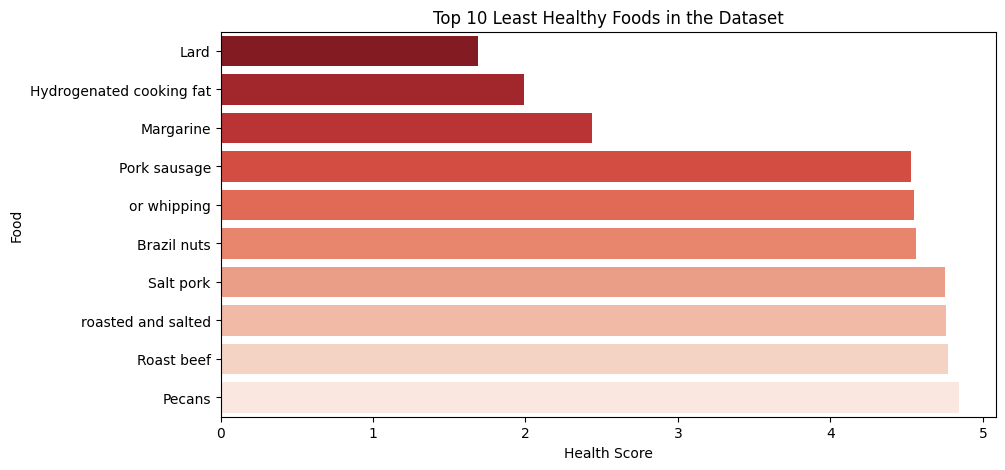

In [24]:


# Step 1: Get the bottom 10 least healthy foods
least_healthy = data.sort_values(by="health_score", ascending=True).head(10)

# Step 2: Bar Plot of the Least Healthy Foods
plt.figure(figsize=(10, 5))
sns.barplot(y=least_healthy["food"], x=least_healthy["health_score"], palette="Reds_r")
plt.xlabel("Health Score")
plt.ylabel("Food")
plt.title("Top 10 Least Healthy Foods in the Dataset")
plt.show()


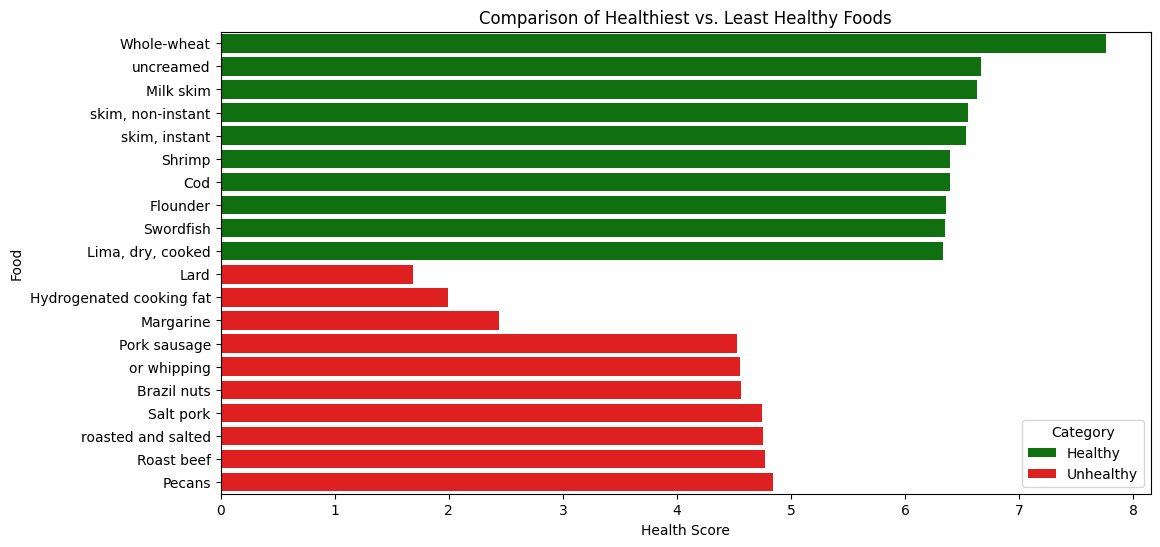

In [25]:
# Combine healthiest and least healthy foods
compare_df = pd.concat([top_healthy, least_healthy])

# Assign labels (Healthy vs. Unhealthy)
compare_df["category"] = ["Healthy"] * 10 + ["Unhealthy"] * 10  # Ensure correct labeling

# Barplot comparing Healthy vs. Unhealthy Foods
plt.figure(figsize=(12, 6))
sns.barplot(y=compare_df["food"], x=compare_df["health_score"], hue=compare_df["category"],
            palette=sns.color_palette(["green", "red"]))  # Using correct color format

plt.xlabel("Health Score")
plt.ylabel("Food")
plt.title("Comparison of Healthiest vs. Least Healthy Foods")
plt.legend(title="Category")
plt.show()


In [26]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "/content/drive/MyDrive/cleaned_nutrients.csv"  # Update with correct filename
data = pd.read_csv(file_path)

# Drop non-numeric & irrelevant columns
data = data.drop(columns=["food", "measure", "category"], errors="ignore")
# Correct column name (all lowercase)
X = data.drop(columns=["healthy_label"])  # Features
y = data["healthy_label"]  # Target variable (1 = Healthy, 0 = Unhealthy)

print("Feature Set Shape:", X.shape)
print("Target Variable Distribution:\n", y.value_counts())


# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(" Data preprocessing complete! Ready for model training. ")



Feature Set Shape: (335, 23)
Target Variable Distribution:
 healthy_label
1    212
0    123
Name: count, dtype: int64
 Data preprocessing complete! Ready for model training. 


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9850746268656716
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.98      1.00      0.99        42

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.99        67



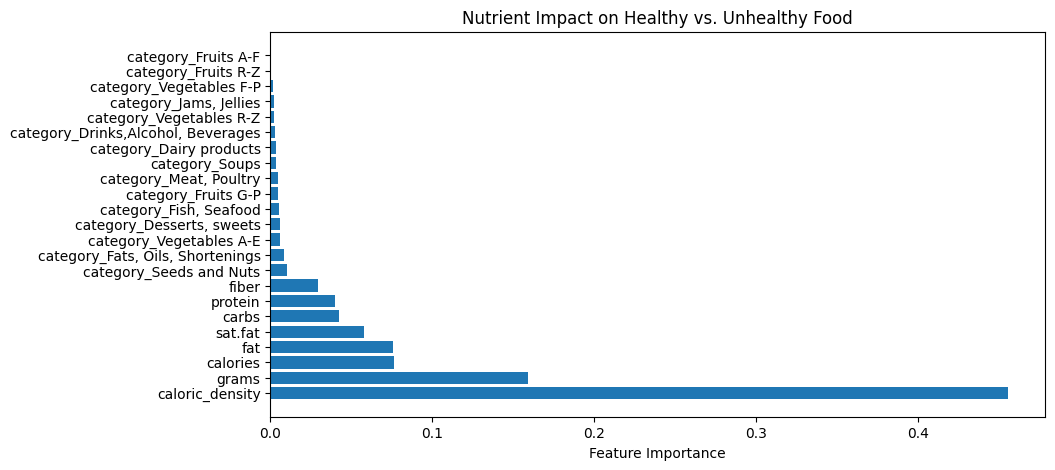

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importance = clf.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
features = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Nutrient Impact on Healthy vs. Unhealthy Food")
plt.show()


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
clf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],      # Number of trees
    "max_depth": [None, 10, 20, 30],     # Maximum depth of trees
    "min_samples_split": [2, 5, 10],     # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 4],       # Minimum samples per leaf
    "bootstrap": [True, False]           # Whether to bootstrap samples
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,
                           cv=5, scoring="accuracy", n_jobs=-1, verbose=2)

# Fit model to training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [30]:
# Train model with best parameters
best_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=50,
    random_state=42
)

# Fit the model
best_model.fit(X_train, y_train)

# Evaluate on test data
accuracy = best_model.score(X_test, y_test)
print(f"Tuned Model Accuracy: {accuracy:.4f}")

# Classification Report
from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Tuned Model Accuracy: 0.9851

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.98      1.00      0.99        42

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.99        67



In [31]:
import pandas as pd

# Load new dataset (update the path if needed)
file_path = '/content/drive/MyDrive/Top 100 Healthiest Food in the World.csv'
data = pd.read_csv(file_path)
data.head()


,Food,Nutrition Value (per 100g),Quantity,Originated From,Calories,Protein (g),Fiber (g),Vitamin C (mg),Antioxidant Score
0,Kale,"High in Vitamins A, C, K","1 cup, chopped",Ancient Greece,49,4.3,3.6,93.4,1770
1,Blueberries,High in Antioxidants,1 cup,North America,84,1.1,3.6,14.4,9621
2,Salmon,Rich in Omega-3 Fatty Acids,3 oz,North Pacific Ocean,208,22.1,0.0,0.0,689
3,Garlic,Contains Allicin,1 clove,Central Asia,4,0.2,0.1,0.9,5708
4,Spinach,High in Iron and Folate,"1 cup, raw",Ancient Persia,23,2.9,2.2,28.1,1515


In [32]:

# Display dataset info
data.info()
print("\nFirst few rows:")
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Food                        98 non-null     object 
 1   Nutrition Value (per 100g)  98 non-null     object 
 2   Quantity                    98 non-null     object 
 3   Originated From             98 non-null     object 
 4   Calories                    98 non-null     int64  
 5   Protein (g)                 98 non-null     float64
 6   Fiber (g)                   98 non-null     float64
 7   Vitamin C (mg)              98 non-null     float64
 8   Antioxidant Score           98 non-null     int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 7.0+ KB

First few rows:
          Food   Nutrition Value (per 100g)        Quantity  \
0         Kale     High in Vitamins A, C, K  1 cup, chopped   
1  Blueberries         High in Antioxidants           1 cup   
2  

In [33]:
# Drop non-numeric columns
data_cleaned = data.drop(columns=["Food", "Nutrition Value (per 100g)", "Quantity", "Originated From"], errors="ignore")


In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical columns
X_scaled = scaler.fit_transform(data_cleaned)


In [35]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (Y)
X = X_scaled  # Already scaled
y = None  # No target column provided in your dataset (needs manual labeling)



In [36]:
# Define a rule-based labeling system
def label_food(calories, fiber, antioxidants):
    if calories < 250 and fiber > 2 and antioxidants > 500:
        return 1  # Healthy
    else:
        return 0  # Unhealthy

# Apply labeling function
data_cleaned["healthy_label"] = data_cleaned.apply(lambda row: label_food(row["Calories"], row["Fiber (g)"], row["Antioxidant Score"]), axis=1)

# Check distribution
print(data_cleaned["healthy_label"].value_counts())


healthy_label
0    51
1    47
Name: count, dtype: int64


In [37]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y)
X = data_cleaned.drop(columns=["healthy_label"])  # Only drop the target variable
y = data_cleaned["healthy_label"]  # Define target variable

print("Feature Set Shape:", X.shape)
print("Target Variable Distribution:\n", y.value_counts())


Feature Set Shape: (98, 5)
Target Variable Distribution:
 healthy_label
0    51
1    47
Name: count, dtype: int64


In [38]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature Scaling Complete!")


Feature Scaling Complete!


In [39]:
from sklearn.model_selection import train_test_split

# Split dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Data split complete! Training set:", X_train.shape, "Testing set:", X_test.shape)



Data split complete! Training set: (78, 5) Testing set: (20, 5)


In [40]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with default parameters
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training complete! ✅")


Model training complete! ✅


In [41]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9500
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [42]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="accuracy",
    n_jobs=-1,  # Use all available cores
    verbose=2
)

# Train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the best model
best_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned:.4f}")
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_tuned))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Model Accuracy: 0.9500
Tuned Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [43]:
import joblib

# Save the trained model
joblib.dump(best_model, "healthy_food_classifier.pkl")

print("Model saved successfully!")


Model saved successfully!


In [44]:
# Load the saved model
loaded_model = joblib.load("healthy_food_classifier.pkl")

# Make predictions with the loaded model
y_pred_loaded = loaded_model.predict(X_test)
print(f"Loaded Model Accuracy: {accuracy_score(y_test, y_pred_loaded):.4f}")


Loaded Model Accuracy: 0.9500


In [45]:
dataset_dir = '/content/drive/MyDrive/Food dataset'


In [46]:
import os

# Define the directory paths
healthy_dir = '/content/drive/MyDrive/Food dataset/Healthy food'
unhealthy_dir = '/content/drive/MyDrive/Food dataset/Unhealthy food'

# Verify that the directories exist
print("Healthy food directory exists:", os.path.exists(healthy_dir))
print("Unhealthy food directory exists:", os.path.exists(unhealthy_dir))

# List all the image files in the directories
healthy_images = [f for f in os.listdir(healthy_dir) if f.lower().endswith('.png') and not f.startswith('.')]
unhealthy_images = [f for f in os.listdir(unhealthy_dir) if f.lower().endswith('.png') and not f.startswith('.')]

print(f"Healthy food images count: {len(healthy_images)}")
print(f"Unhealthy food images count: {len(unhealthy_images)}")

# Display sample image names to ensure files are accessible
print("Healthy food sample images:", healthy_images[:5])
print("Unhealthy food sample images:", unhealthy_images[:5])




Healthy food directory exists: True
Unhealthy food directory exists: True
Healthy food images count: 16
Unhealthy food images count: 16
Healthy food sample images: ['banana.png', 'egg.png', 'orange.png', 'avacado.png', 'tomato.png']
Unhealthy food sample images: ['Burgers.png', 'pizza.png', 'freach fries.png', 'donuts.png', 'Hard drinks.png']


In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [48]:
IMAGE_SIZE = (128, 128)  # Resize to a consistent size
BATCH_SIZE = 32


In [49]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to be between 0 and 1
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Just rescaling for validation/test


In [50]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Food dataset' , # Provide the correct path to your dataset
    target_size=IMAGE_SIZE,  # Resize images to fit the model
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Since it’s binary classification (healthy vs unhealthy)
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Food dataset',  # Same directory path
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 32 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # Input shape matches resized images
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to reduce overfitting

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,  # You can adjust this number as needed
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 0.6944 - val_accuracy: 0.5312 - val_loss: 0.6815
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5625 - loss: 0.7621 - val_accuracy: 0.5000 - val_loss: 0.9538
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.8630 - val_accuracy: 0.5625 - val_loss: 0.6683
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3125 - loss: 0.7728 - val_accuracy: 0.5312 - val_loss: 0.6786
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 0.6952 - val_accuracy: 0.5938 - val_loss: 0.6674
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5312 - loss: 0.6902 - val_accuracy: 0.5938 - val_loss: 0.6537
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5625 - loss: 0.6704 - val_accuracy: 0.5312 - val_loss: 0.6501
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5625 - loss: 0.6560 - val_accuracy: 0.5938 - val_loss: 0.6293
Epoch 9/10
1/1 ━

In [53]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f'Test accuracy: {test_acc}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step - accuracy: 0.6562 - loss: 0.5726
Test accuracy: 0.65625


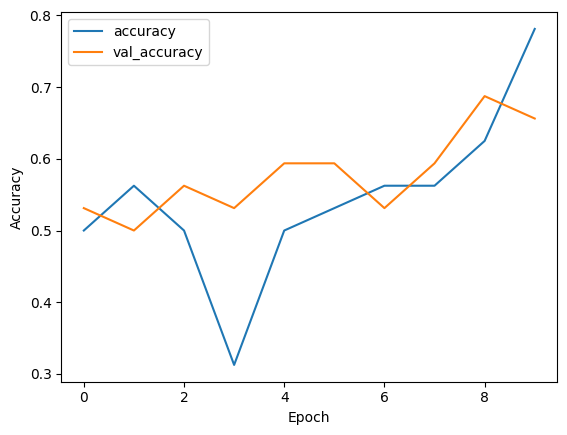

In [54]:

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()  # Corrected line
plt.show()




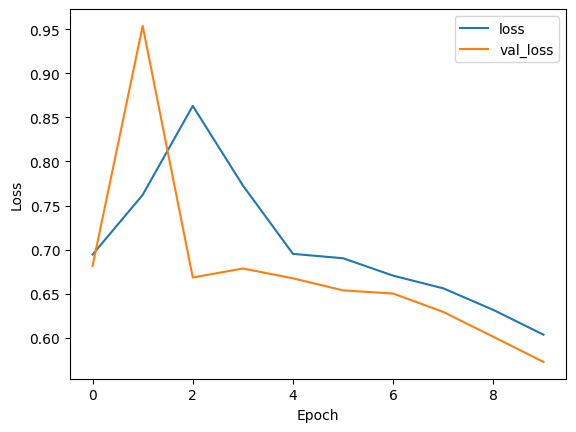

In [55]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [56]:
# Make predictions
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/Food dataset/Unhealthy food/pizza.png'  # Path to an image you want to classify
img = image.load_img(img_path, target_size=IMAGE_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

# Predict the class
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("Unhealthy food")
else:
    print("Healthy food")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Unhealthy food


In [57]:
# Make predictions


img_path = '/content/drive/MyDrive/Food dataset/Healthy food/milk.png'  # Path to an image you want to classify
img = image.load_img(img_path, target_size=IMAGE_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

# Predict the class
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("Unhealthy food")
else:
    print("Healthy food")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Healthy food


In [58]:
model.save('/content/drive/MyDrive/food_model.keras')  # Recommended Keras 3 format


In [59]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/food_model.keras')


In [60]:

model = tf.keras.models.load_model('/content/drive/MyDrive/food_model.keras', compile=False)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


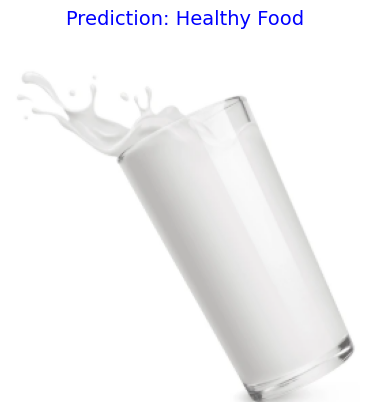

In [61]:


model = tf.keras.models.load_model('/content/drive/MyDrive/food_model.keras')  # Use .keras format


IMAGE_SIZE = (128, 128)

#  Load and preprocess the image
img_path = '/content/drive/MyDrive/Food dataset/Healthy food/milk.png'
img = image.load_img(img_path, target_size=IMAGE_SIZE)  # Resize image correctly
img_array = image.img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

#  Make prediction
prediction = model.predict(img_array)

#  Determine class (assuming binary classification)
class_label = "Unhealthy Food" if prediction[0][0] > 0.5 else "Healthy Food"

#  Display the image with prediction
plt.imshow(image.load_img(img_path))  # Load image for display
plt.axis("off")  # Hide axes
plt.title(f"Prediction: {class_label}", fontsize=14, color="blue")  # Show prediction
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


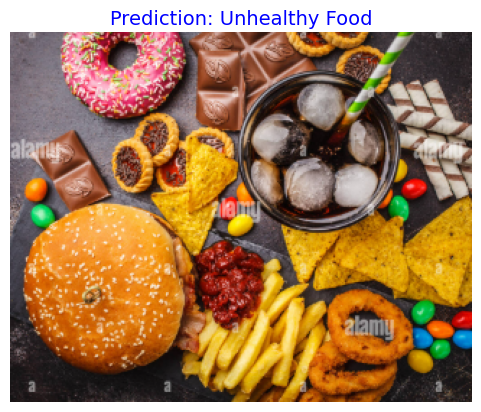

In [62]:
img_path = '/content/drive/MyDrive/Food dataset/Unhealthy food/sweets.png'
img = image.load_img(img_path, target_size=IMAGE_SIZE)  # Resize image correctly
img_array = image.img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

#  Make prediction
prediction = model.predict(img_array)

#  Determine class (assuming binary classification)
class_label = "Unhealthy Food" if prediction[0][0] > 0.5 else "Healthy Food"

#  Display the image with prediction
plt.imshow(image.load_img(img_path))  # Load image for display
plt.axis("off")  # Hide axes
plt.title(f"Prediction: {class_label}", fontsize=14, color="blue")  # Show prediction
plt.show()


